In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/anastasiaintyakova/bsu/oiad/teen_phone_addiction_dataset.csv')

In [9]:
N = 10
columns = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
column_name = columns[N % 7]
print(f"Выбранный столбец для анализа: {column_name}")

Выбранный столбец для анализа: Screen_Time_Before_Bed


# Часть I: Описательная статистика

In [94]:
data = df[column_name]
data_mean = data.mean()
data_variance = data.var()
data_mode = data.mode()[0] if not data.mode().empty else 'No unique mode'
data_median = data.median()
data_quantiles = data.quantile([0.25, 0.5, 0.75])
data_kurtosis = data.kurt()
data_skewness = data.skew()
data_iqr = data_quantiles[0.75] - data_quantiles[0.25]

print(f"Среднее: {data_mean:.2f}")
print(f"Дисперсия: {data_variance:.2f}")
print(f"Мода: {data_mode}")
print(f"Медиана: {data_median:.2f}")
print(f"Квантили (0.25, 0.5, 0.75):\n{data_quantiles}")
print(f"Эксцесс: {data_kurtosis:.2f}")
print(f"Асимметрия: {data_skewness:.2f}")
print(f"Интерквартильный размах (IQR): {data_iqr:.2f}")

Среднее: 1.01
Дисперсия: 0.24
Мода: 1.0
Медиана: 1.00
Квантили (0.25, 0.5, 0.75):
0.25    0.7
0.50    1.0
0.75    1.4
Name: Screen_Time_Before_Bed, dtype: float64
Эксцесс: -0.35
Асимметрия: 0.10
Интерквартильный размах (IQR): 0.70


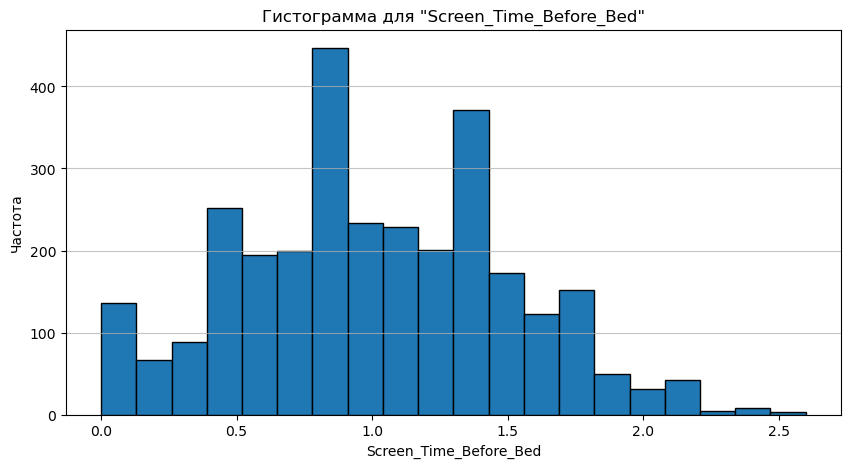

In [82]:
plt.figure(figsize=(10, 5))
plt.hist(data, bins=20, edgecolor='black')
plt.title(f'Гистограмма для "{column_name}"')
plt.xlabel(column_name)
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

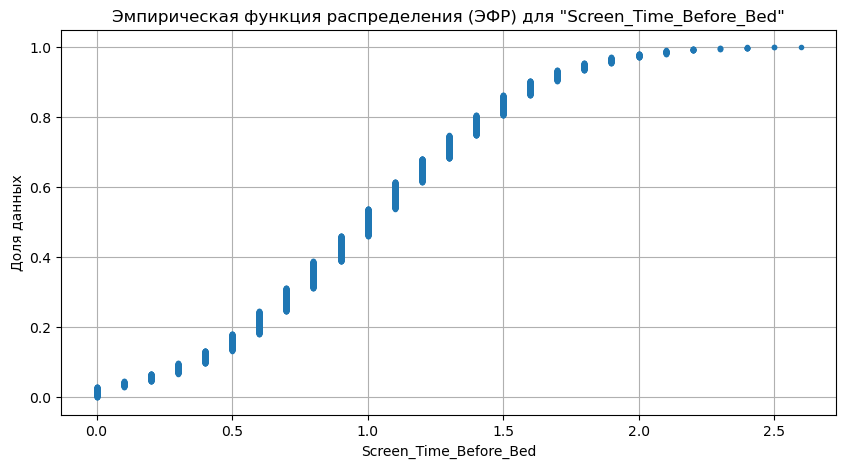

In [84]:
data_sorted = np.sort(data)
ecdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
plt.figure(figsize=(10, 5))
plt.plot(data_sorted, ecdf, marker='.', linestyle='none')
plt.title(f'Эмпирическая функция распределения (ЭФР) для "{column_name}"')
plt.xlabel(column_name)
plt.ylabel('Доля данных')
plt.grid(True)
plt.show()

# Вывод
На основе предоставленных данных, показатель "Screen_Time_Before_Bed" имеет среднее значение, моду и медиану, близкие к 1.0, что указывает на центральную тенденцию и симметричность распределения. Интерквартильный размах (IQR) 0.7 показывает умеренный разброс данных. Гистограмма визуально напоминает колоколообразную форму, а эмпирическая функция распределения (ЭФР) имеет плавный S-образный рост, характерный для слабо варьирующихся данных.

# Часть II: Проверка на нормальность

In [61]:
num_bins = 10
counts, bin_edges = np.histogram(data, bins=num_bins)
mu, std = data.mean(), data.std()
expected_counts = len(data) * (stats.norm.cdf(bin_edges[1:], mu, std) - stats.norm.cdf(bin_edges[:-1], mu, std))
chi2_statistic = np.sum((counts - expected_counts)**2 / expected_counts)
degrees_of_freedom = num_bins - 2 - 1
p_value = 1 - stats.chi2.cdf(chi2_statistic, degrees_of_freedom)

print(f"Статистика Хи-квадрат: {chi2_statistic:.2f}")
print(f"p-значение: {p_value:.4f}")
if p_value < 0.05:
    print("Вывод: Данные, вероятно, не являются нормальными (p < 0.05).")
else:
    print("Вывод: Нет оснований отклонить гипотезу о нормальности (p >= 0.05).")

print(f"\nАсимметрия: {data_skewness:.2f} (норма: ~0)")
print(f"Эксцесс: {data_kurtosis:.2f} (норма: ~0)")
if abs(data_skewness) > 0.5 or abs(data_kurtosis) > 1:
    print("Вывод: Значения асимметрии или эксцесса указывают на отклонение от нормальности.")
else:
    print("Вывод: Значения асимметрии и эксцесса близки к нормальным.")

Статистика Хи-квадрат: 153.96
p-значение: 0.0000
Вывод: Данные, вероятно, не являются нормальными (p < 0.05).

Асимметрия: 0.10 (норма: ~0)
Эксцесс: -0.35 (норма: ~0)
Вывод: Значения асимметрии и эксцесса близки к нормальным.


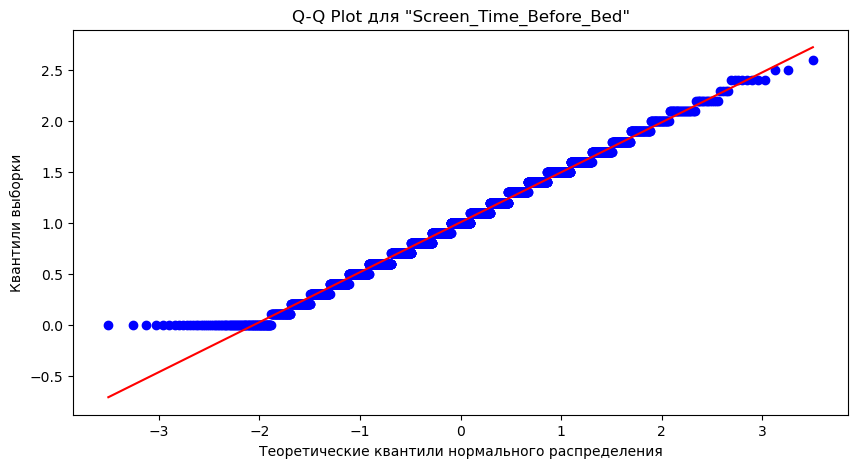

In [63]:
plt.figure(figsize=(10, 5))
stats.probplot(data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot для "{column_name}"')
plt.xlabel('Теоретические квантили нормального распределения')
plt.ylabel('Квантили выборки')
plt.show()

# Вывод
Хотя значения асимметрии (0.10) и эксцесса (-0.35) близки к нулю, что обычно свидетельствует о нормальном распределении, статистический критерий Хи-квадрат показал значительное отклонение от нормальности (p-значение 0.0000 < 0.05). Q-Q plot также подтверждает это, демонстрируя отклонения в "хвостах" распределения от теоретической прямой.

# Часть III: Обработка данных

In [73]:
processed_data = data.copy()
min_positive = processed_data[processed_data > 0].min()
processed_data[processed_data <= 0] = min_positive
processed_data = np.log(processed_data)

print("Данные были обработаны с помощью логарифмирования.")
print("Повторная оценка обработанных данных:")

processed_mean = processed_data.mean()
processed_variance = processed_data.var()
processed_skewness = processed_data.skew()
processed_kurtosis = processed_data.kurt()

print(f"Среднее (обработанные): {processed_mean:.2f}")
print(f"Дисперсия (обработанные): {processed_variance:.2f}")
print(f"Асимметрия (обработанные): {processed_skewness:.2f}")
print(f"Эксцесс (обработанные): {processed_kurtosis:.2f}")

Данные были обработаны с помощью логарифмирования.
Повторная оценка обработанных данных:
Среднее (обработанные): -0.16
Дисперсия (обработанные): 0.47
Асимметрия (обработанные): -1.50
Эксцесс (обработанные): 2.29


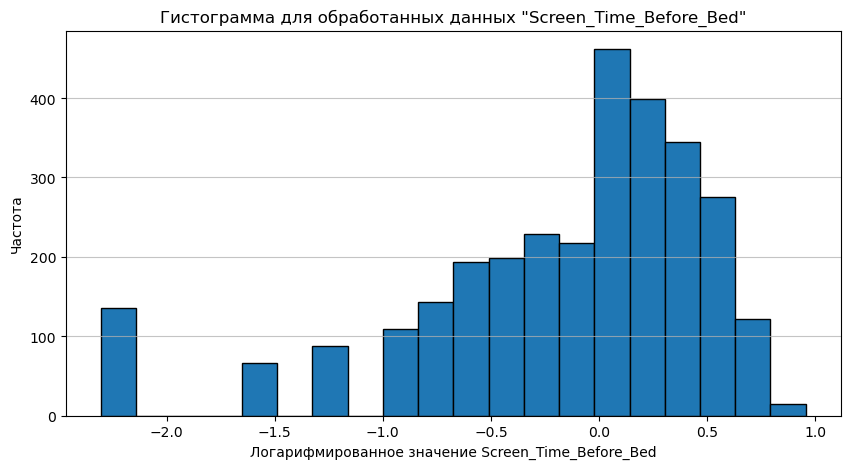

In [86]:
plt.figure(figsize=(10, 5))
plt.hist(processed_data, bins=20, edgecolor='black')
plt.title(f'Гистограмма для обработанных данных "{column_name}"')
plt.xlabel(f'Логарифмированное значение {column_name}')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

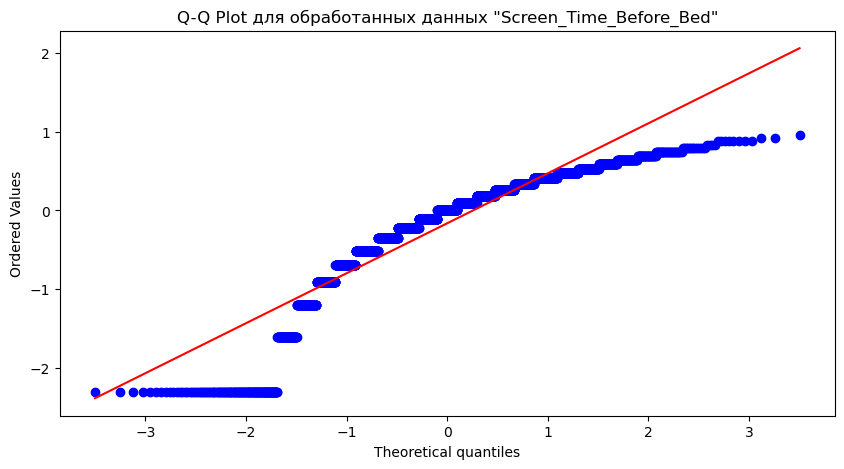

In [88]:
plt.figure(figsize=(10, 5))
stats.probplot(processed_data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot для обработанных данных "{column_name}"')
plt.show()

# Вывод
Логарифмическое преобразование не привело данные к нормальному виду, а, наоборот, ухудшило их. После обработки асимметрия стала сильно отрицательной (-1.50), а эксцесс увеличился (2.29), что указывает на то, что распределение стало более скошенным влево и имеет "тяжелые хвосты". Таким образом, данное преобразование не подходит для нормализации этой переменной.

# Часть IV: Анализ по группам 'School_Grade'

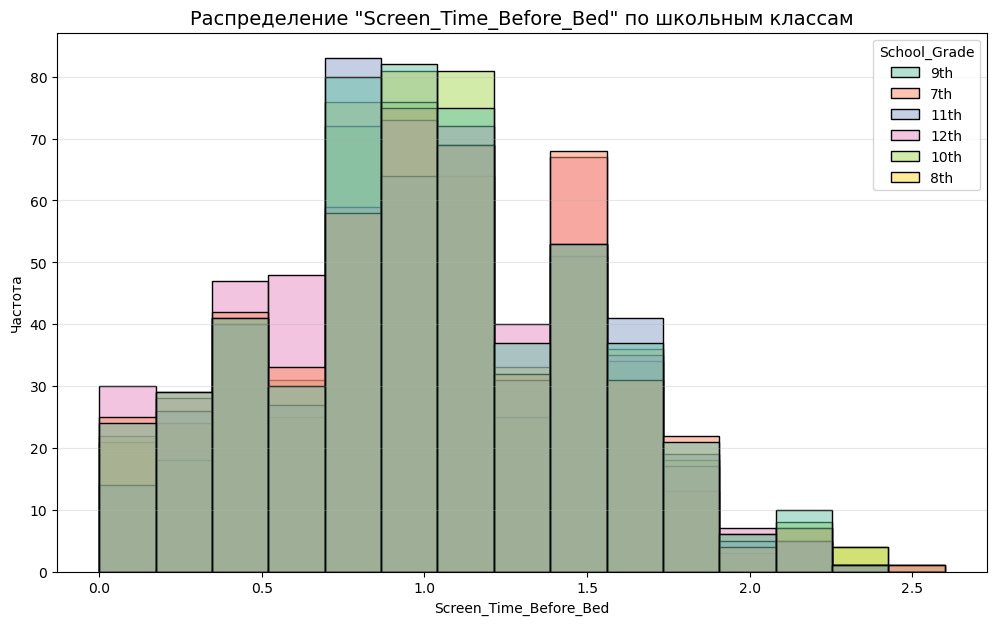

In [96]:
plt.figure(figsize=(12, 7))
sns.histplot(
    data=df,
    x=column_name,
    hue="School_Grade",
    bins=15,
    edgecolor="black",
    alpha=0.5,
    palette="Set2",
    multiple="layer"   
)
plt.title(f'Распределение "{column_name}" по школьным классам', fontsize=14)
plt.xlabel(column_name)
plt.ylabel("Частота")
plt.grid(axis="y", alpha=0.3)
plt.show()

In [98]:
grouped_stats = df.groupby("School_Grade")[column_name].agg(["mean", "var"])
print("\nСреднее и дисперсия по группам 'School_Grade':")
print(grouped_stats)


Среднее и дисперсия по группам 'School_Grade':
                  mean       var
School_Grade                    
10th          1.020945  0.240960
11th          1.022547  0.233507
12th          0.982420  0.243762
7th           1.006640  0.254694
8th           1.005187  0.241366
9th           1.005133  0.244107


# Вывод
Анализ показателя "Screen_Time_Before_Bed" по разным школьным классам не выявил существенных различий. Средние значения времени перед экраном для всех классов находятся около 1.0 часа, а дисперсии варьируются в узком диапазоне от 0.23 до 0.25. Это говорит о том, что время, проведенное перед экраном перед сном, не сильно зависит от школьного класса.